In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from collections import Counter

In [2]:
df= pd.read_csv("spam2.csv",encoding="latin-1" )
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True,axis = 1)

In [8]:
# Rename the column name 
df.rename(columns = {"v1":"target","v2": "text"},inplace = True)

In [9]:
# Perform labelencoding on target column
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
df['target']= encoder.fit_transform(df["target"])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# Check duplicate
df.duplicated().sum()

np.int64(403)

In [13]:
# Remove duplicate value
df= df.drop_duplicates(keep = "first")

Explorative Data Analysis

In [14]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

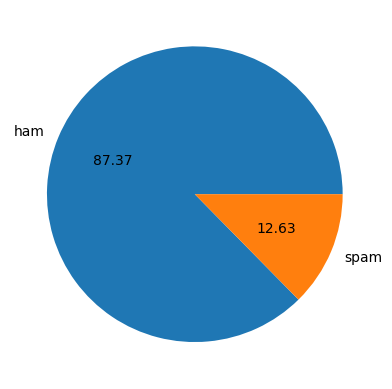

DATA is Imbalanced


In [18]:
plt.pie(df["target"].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")
plt.show()
print("DATA is Imbalanced")

In [17]:
# nltk library is used for counting number of words,character in a text
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\trish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df["num_character"]= df["text"].apply(len)  # count the number of character in text column
df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x))) #Counts number of word in text
df["num_sentences"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))# Counts number of sentence

In [22]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[df["target"]== 1][["num_character","num_words","num_sentences"]].describe() 

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
df[df["target"]== 0][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_character', ylabel='Count'>

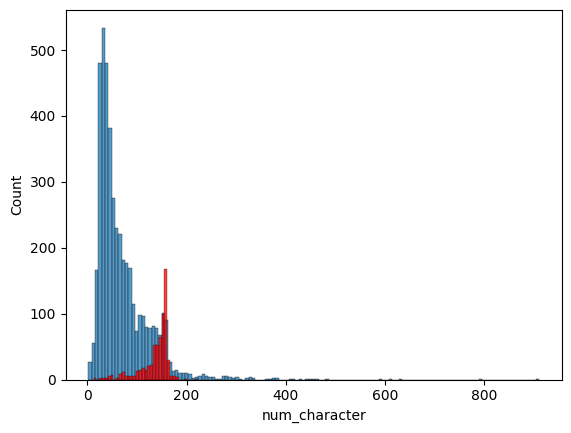

In [25]:
import seaborn as sns
sns.histplot(df[df['target']== 0]["num_character"])
sns.histplot(df[df['target']== 1]["num_character"],color = "red")

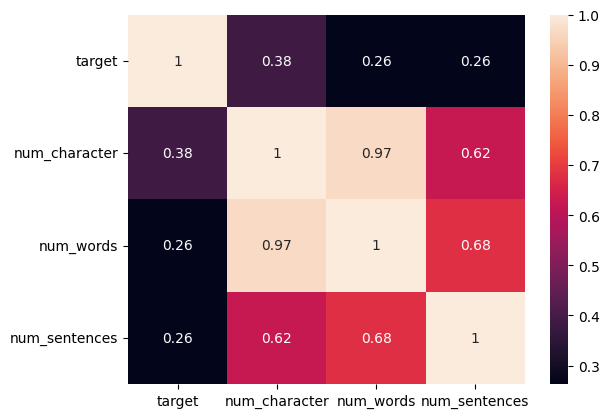

In [26]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr,annot = True)
plt.show()

## Data Processing


In [29]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
def transform_text(text):
    text = text.lower()
    text= nltk.word_tokenize(text)
    y =[]
    for i in text :
        if i.isalnum():
         y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation :   # Checks text stopwords or punctuation 
            y.append(ps.stem(i))
    return " ".join(y)
            
    

In [31]:
df["transform_text"]=df["text"].apply(transform_text)

In [33]:
df.head(1)

,target,text,num_character,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [57]:
from wordcloud import WordCloud
wc = WordCloud(width = 2000,height = 2000, min_font_size=10,background_color = "white")

In [58]:
spam_wc = wc.generate(df[df["target"] == 1]["transform_text"].str.cat(sep=" "))

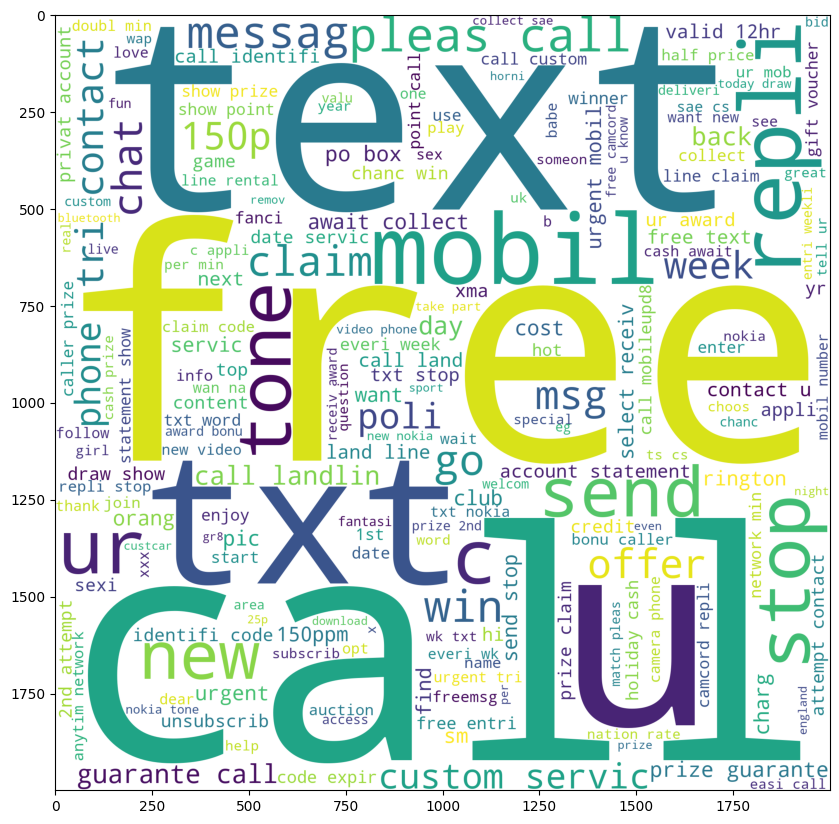

In [59]:
plt.figure(figsize = (10,11))
plt.imshow(spam_wc)

In [60]:
haam_wc = wc.generate(df[df["target"] == 0]["transform_text"].str.cat(sep=" "))

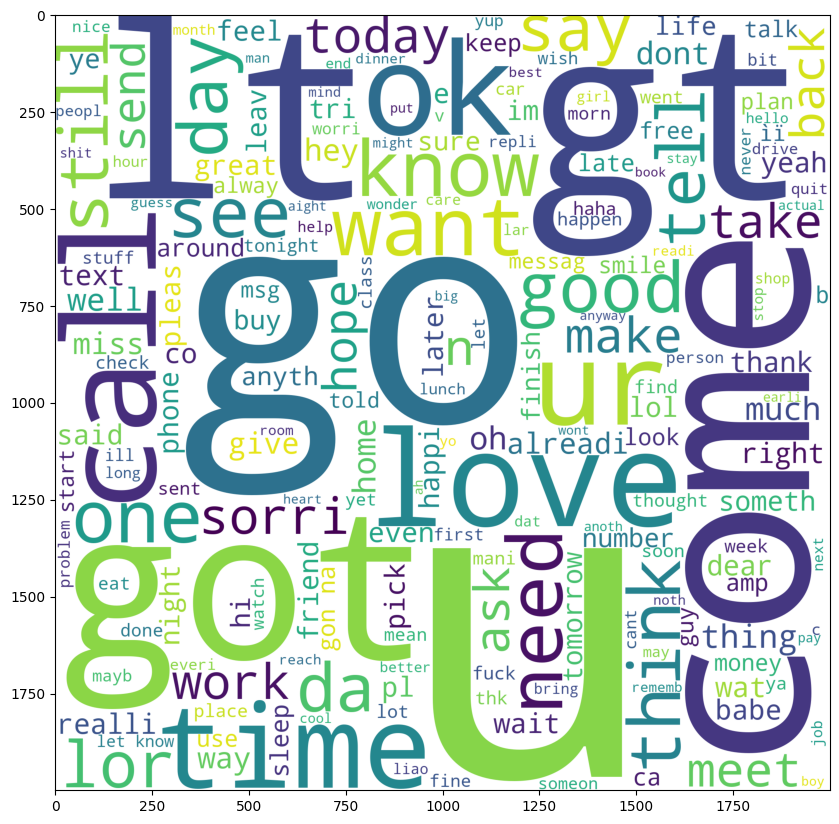

In [61]:
plt.figure(figsize = (10,11))
plt.imshow(spam_wc)

In [67]:
spam_corpus =[]
for msg in df[df["target"] ==  1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

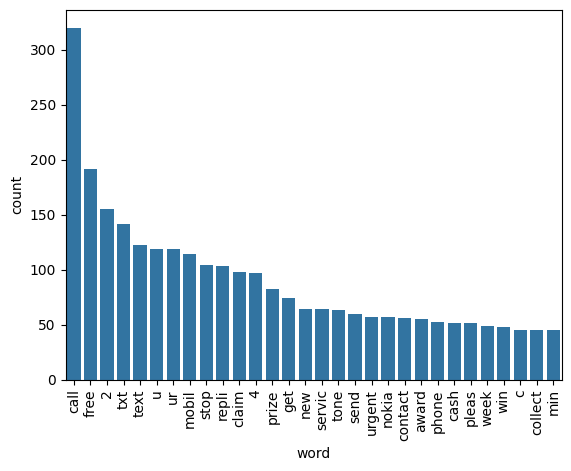

In [68]:
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word', 'count'])
# Plot the common words
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation="vertical")  # rotate labels for readability
plt.show()

In [69]:
ham_corpus=[]
for msg in df[df["target"]==0]["transform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

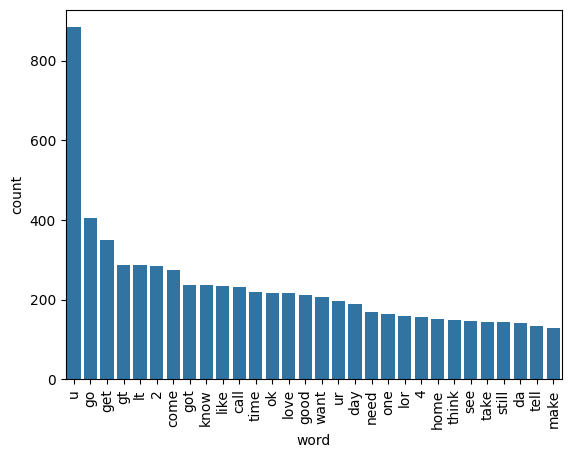

In [70]:
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word', 'count'])
# Plot the 30 common words
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation="vertical")  # rotate labels for readability
plt.show()

## Model Building

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer  # perform vectorization on text
tfidf = TfidfVectorizer(max_features = 3000)

In [49]:
X= tfidf.fit_transform(df["transform_text"]).toarray()

In [50]:
y= df["target"].values

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [53]:
mnb=MultinomialNB()

In [56]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Acurracy of model :",accuracy_score(y_test,y_pred2))
print( "Confusion matrix : \n",confusion_matrix(y_test,y_pred2))
print("Precision of Model :",precision_score(y_test,y_pred2)) 

Acurracy of model : 0.9664732430689877
Confusion matrix : 
 [[1342    0]
 [  52  157]]
Precision of Model : 1.0


In [64]:
import pickle
pickle.dump(tfidf,open('C:\\Users\\trish\\OneDrive\\Documents\\Machinelearning\\machinelearning_tut\\vectorizer.pkl',"wb"))
pickle.dump(mnb,open('C:\\Users\\trish\\OneDrive\\Documents\\Machinelearning\\machinelearning_tut\\model.pkl',"wb"))
